In [1]:
using DifferentialEquations, CairoMakie
using Compactons

In [2]:
L = 10
N = 5000
E₀ = 5
;

In [3]:
tmax = 5.0
;

In [13]:
dx = L/N
x = 0.0:dx:L

tsave = 0.0:1e-2:tmax
tspan = (tsave[1], tsave[end])

φ₀ = zero(x)
∂ₜφ₀ = zero(x)

α  = 0.5
x₀ = 0.5

∂ₜφ₀ += ∂ₜoscillon.(α, x .- x₀, l=1)

5001-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [14]:
energy = SavedValues(Float64, Float64)
cbenergy = SavingCallback(getenergy, energy; saveat=tsave)

hamiltonian = SavedValues(Float64, Vector{Float64})
cbhamiltonian = SavingCallback(gethamiltonian, hamiltonian; saveat=tsave)

callback = CallbackSet(cbenergy, cbhamiltonian)

prob = SecondOrderODEProblem(fieldeq!, ∂ₜφ₀, φ₀, tspan, (signumgordon, N, dx))
@time sol = solve(prob, RK4(); adaptive=false, dt=dx / 10, 
                saveat=tsave, save_idxs=N+1:10:2N, callback=callback)

  1.713772 seconds (20.86 M allocations: 438.701 MiB, 4.99% gc time)


retcode: Success
Interpolation: 1st order linear
t: 501-element Vector{Float64}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 ⋮
 4.92
 4.93
 4.94
 4.95
 4.96
 4.97
 4.98
 4.99
 5.0
u: 501-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 3.972233131589744e-10, 8.018718539535244e-23, 4.994727414506008e-25, 4.994727414506008e-25, 4.994727414506008e-25, 4.994727414506008e-25, 4.994727414506008e-25, 4.994727414506008e-25, 4.994727414506008e-25  …  4.994727414506008e-25, 4.994727414506008e-25, 4.994727414506008e-25, 4.994727414506008e-25, 4.994727414506008e-25, 4.994727414506008e-25, 4.994727414506008e-25, 4.994727414506008e-25, 4.994727414506008e-25, 6.483487970779443e-11]
 [0.0, 2.242008338985961e-9, 7.782662404178846e-14, 4.994727413964553e-25, 4.994727413964553e-25, 4.994727413964553e-25, 4.994727413964553e-25, 4.994727413964553e-25, 4.994727413964553e-25, 4.994727413964553e-25 

In [20]:
φ = reduce(hcat, sol.u)
H = reduce(hcat, hamiltonian.saveval)

#xsave = x[1:10:N]
xsave = x[1:500:N]

length(xsave)

10

## Campo

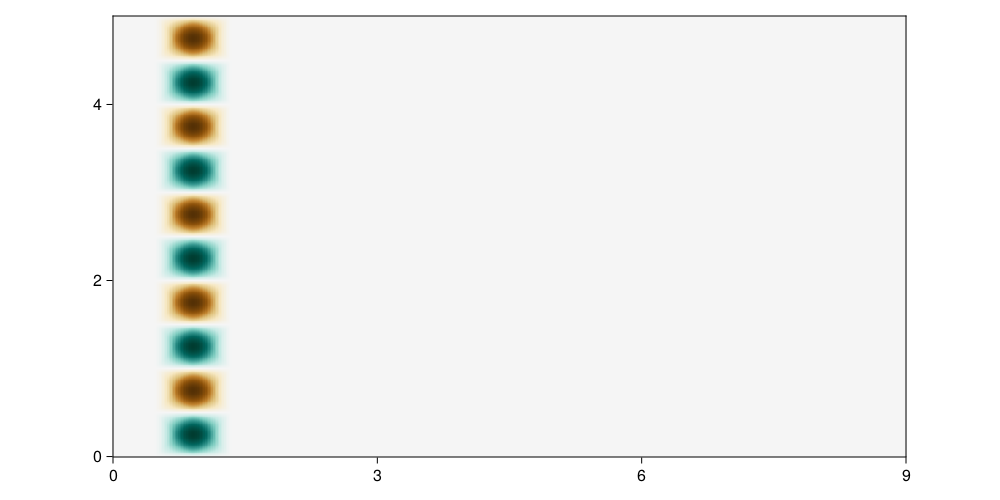

In [21]:
#fig = Figure(resolution=(1000, 2000))
fig = Figure(resolution=(1000, 500))
ax, hm = heatmap(fig[1, 1], xsave, tsave, φ, colormap=:BrBG_11)
ax.aspect = DataAspect()

fig

### Campo no instante final

In [8]:
lines(xsave, φ[:, end])

DimensionMismatch: DimensionMismatch: arrays could not be broadcast to a common size; got a dimension with lengths 50 and 500

## Densidade de energia

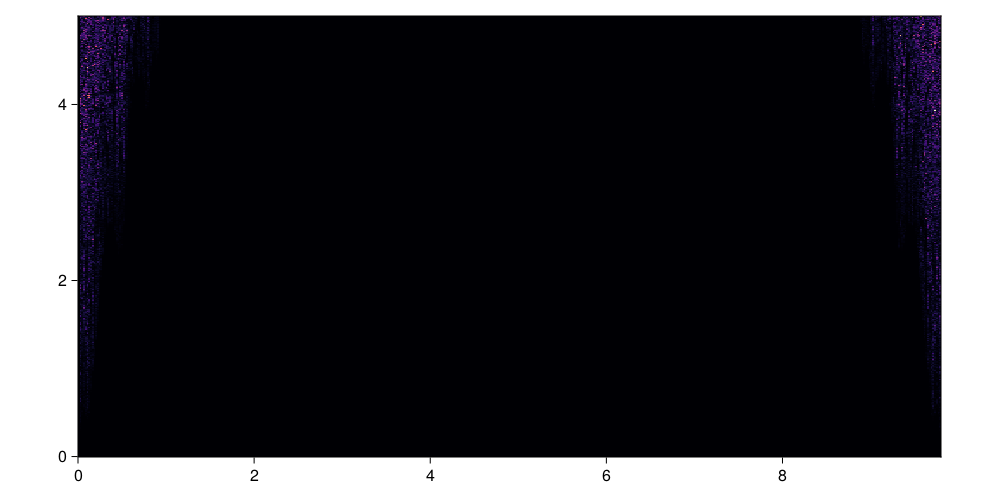

In [9]:
fig = Figure(resolution=(1000, 500))
ax, hm = heatmap(fig[1, 1], xsave, tsave, H, colormap=:magma)
ax.aspect = DataAspect()
fig

## Energia como função do tempo

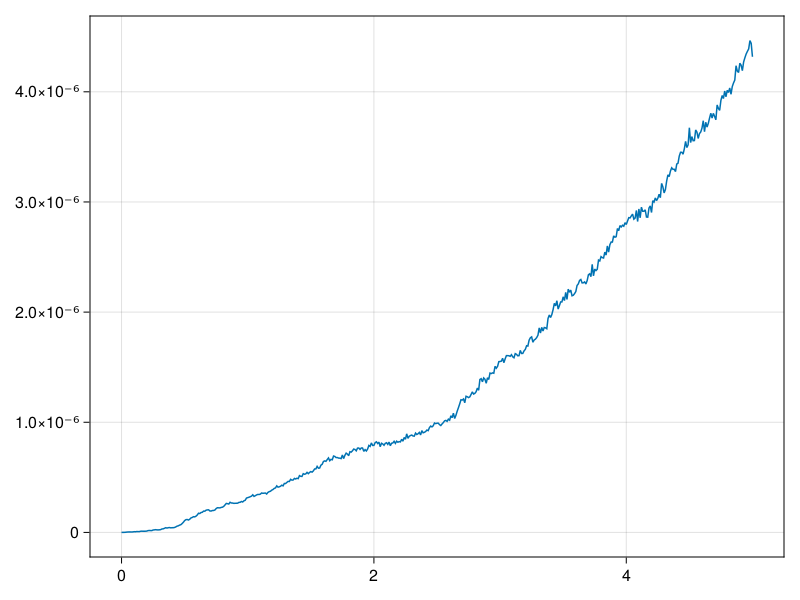

In [10]:
lines(tsave, energy.saveval)

In [11]:
1 - energy.saveval[end] / energy.saveval[begin]

-Inf